# Adding new samples to an existing embedding

This notebook demonstrates how to embed new, unseen samples into an existing t-SNE embedding. Basic usage is described in detail in `simple_usage.ipynb`, so a lot of details on t-SNE are skipped here.

In [1]:
from fastTSNE import TSNE
from fastTSNE.callbacks import ErrorLogger

from examples import utils

import numpy as np
import scipy.sparse as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

### Load data

In [2]:
x, y = utils.get_zeisel_2018()

# x and y have the following data types
x: sp.spmatrix
y: np.ndarray

In [3]:
print('Data set contains %d samples with %d features' % x.shape)

Data set contains 160796 samples with 27932 features


### Create train/test split

We'll split our data set into a training and test sets, as is typically done in most machine learning settings. The test set represents new data that wasn't available at runtime.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [5]:
print('%d training samples' % x_train.shape[0])
print('%d test samples' % x_test.shape[0])

112557 training samples
48239 test samples


### SVD preprocessing

In [6]:
svd = TruncatedSVD(n_components=50)

In [7]:
%time x_train_prime = svd.fit_transform(x_train)

CPU times: user 1min 15s, sys: 7.8 s, total: 1min 23s
Wall time: 1min 11s


### t-SNE

In [8]:
tsne = TSNE(n_components=2, negative_gradient_method='fft', neighbors='approx',
            callbacks=ErrorLogger(), n_jobs=8)

In [9]:
%time embedding_train = tsne.fit(x_train_prime)

Iteration   50, KL divergence  8.0127, 50 iterations in 3.4557 sec
Iteration  100, KL divergence  7.1771, 50 iterations in 3.0599 sec
Iteration  150, KL divergence  6.3823, 50 iterations in 3.6115 sec
Iteration  200, KL divergence  5.9312, 50 iterations in 4.1046 sec
Iteration  250, KL divergence  5.6442, 50 iterations in 3.2756 sec
Iteration   50, KL divergence  5.4892, 50 iterations in 3.3563 sec
Iteration  100, KL divergence  5.2237, 50 iterations in 3.4372 sec
Iteration  150, KL divergence  4.9426, 50 iterations in 3.2970 sec
Iteration  200, KL divergence  4.6821, 50 iterations in 3.4352 sec
Iteration  250, KL divergence  4.4536, 50 iterations in 3.5457 sec
Iteration  300, KL divergence  4.2573, 50 iterations in 3.6161 sec
Iteration  350, KL divergence  4.0882, 50 iterations in 3.6840 sec
Iteration  400, KL divergence  3.9420, 50 iterations in 4.1421 sec
Iteration  450, KL divergence  3.8143, 50 iterations in 4.1582 sec
Iteration  500, KL divergence  3.7017, 50 iterations in 4.4188

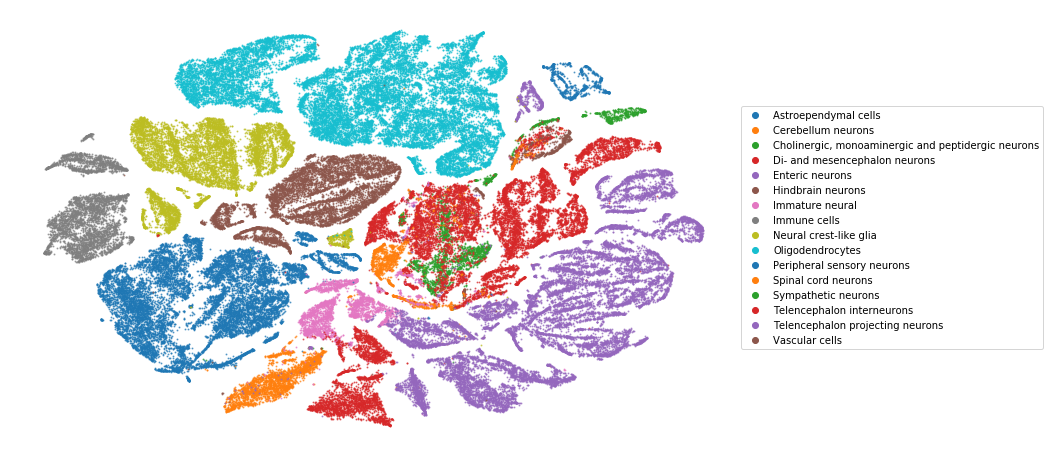

In [10]:
fig = plt.figure(figsize=(13, 8))
utils.plot(embedding_train, y_train, ax=fig.gca())

### Embedding new samples

First, we need to project the test data into the same reduced space as the training data.

In [11]:
%time x_prime_test = svd.transform(x_test)

CPU times: user 2.45 s, sys: 3.22 ms, total: 2.46 s
Wall time: 2.46 s


Now, we can add samples from the reduced representations to our embedding and optimize for a couple hundred iterations.

In [12]:
%time embedding_test = embedding_train.transform(x_prime_test)

Iteration   50, KL divergence  3.5838, 50 iterations in 2.5656 sec
Iteration  100, KL divergence  3.5674, 50 iterations in 2.5039 sec
Iteration   50, KL divergence  3.5645, 50 iterations in 2.6782 sec
Iteration  100, KL divergence  3.5615, 50 iterations in 2.5450 sec
CPU times: user 1min 1s, sys: 234 ms, total: 1min 1s
Wall time: 15.4 s


Let's plot the newly embedded data.

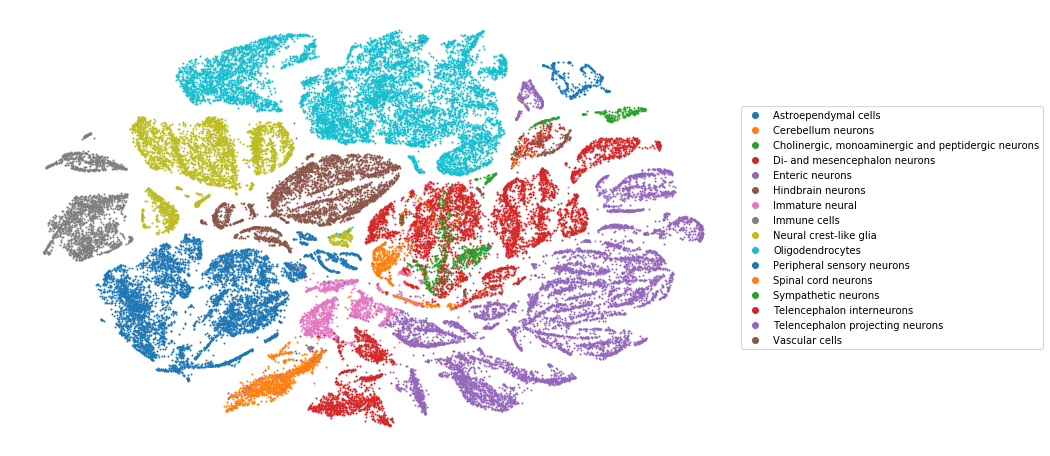

In [13]:
fig = plt.figure(figsize=(13, 8))
utils.plot(embedding_test, y_test, ax=fig.gca(), alpha=1)

Looks familliar, doesn't it? If we compare this to the above plot, we can see that the colors match up.

We superimpose the embedded test samples over the training samples in the hope that the correspondence will be even clearer. We plot the training samples with high transparency, and the test samples with no transparency so hopefully, they stand out a bit more.

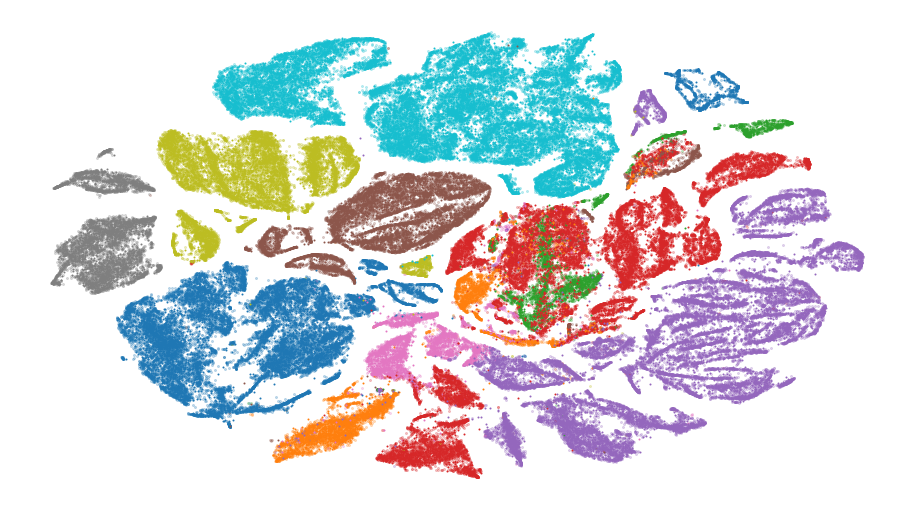

In [14]:
fig = plt.figure(figsize=(16, 9))
utils.plot(embedding_train, y_train, ax=fig.gca(), alpha=0.25, ms=2, draw_legend=False)
plt.gca().set_prop_cycle(None)
utils.plot(embedding_test, y_test, ax=fig.gca(), alpha=1, draw_legend=False)